In [2]:
import pandas as pd
import numpy as np
import sklearn

print('scikit-learn: {}'.format(sklearn.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

scikit-learn: 0.22.2.post1
pandas: 1.1.5
numpy: 1.18.5


In [4]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [6]:
from google.colab import files
uploaded = files.upload()

Saving OJ.csv to OJ.csv


In [7]:
# Read in the data

df = pd.read_csv("OJ.csv") 

## Preprocess

In [8]:
# About the data

print('Shape of dataset:', df.shape, '\n')
print('Number of stores:', df['StoreID'].nunique())
print('Store IDs:', df['StoreID'].unique(),'\n')
print('Purchase brands (target):', df['Purchase'].unique(),'\n')
df.head(3)
print('\n')
df.describe()

Shape of dataset: (1070, 10) 

Number of stores: 5
Store IDs: [1 7 2 3 4] 

Purchase brands (target): ['CH' 'MM'] 



,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,Purchase
0,237,1,1.75,1.99,0.00,0.0,0,0,0.50,CH
1,239,1,1.75,1.99,0.00,0.3,0,1,0.60,CH
2,245,1,1.86,2.09,0.17,0.0,0,0,0.68,CH


,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782
std,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843
min,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011
25%,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257
50%,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000
75%,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873
max,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947


Text(0.5, 1.0, 'WeekofPurchase Distribution')

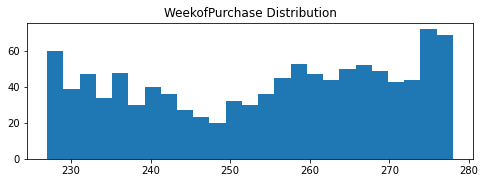

Text(0.5, 1.0, 'StoreID Distribution')

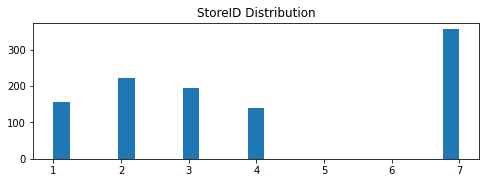

Text(0.5, 1.0, 'PriceCH Distribution')

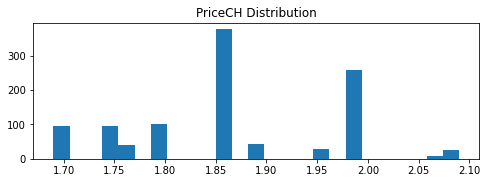

Text(0.5, 1.0, 'PriceMM Distribution')

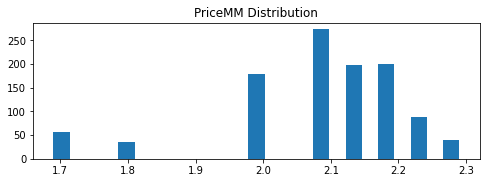

Text(0.5, 1.0, 'DiscCH Distribution')

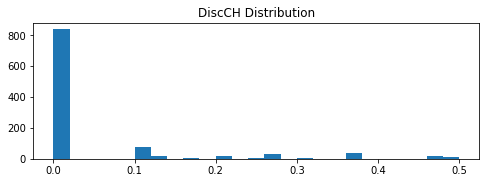

Text(0.5, 1.0, 'DiscMM Distribution')

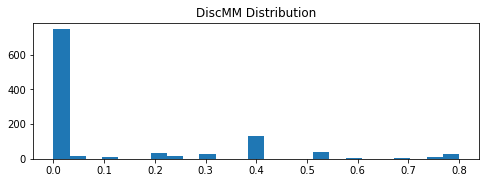

Text(0.5, 1.0, 'SpecialCH Distribution')

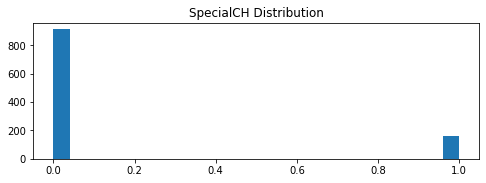

Text(0.5, 1.0, 'SpecialMM Distribution')

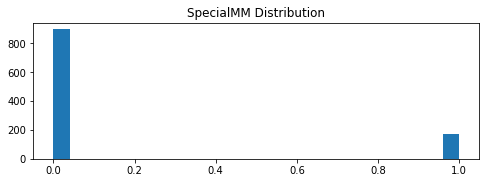

Text(0.5, 1.0, 'LoyalCH Distribution')

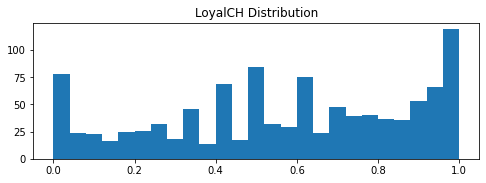

Text(0.5, 1.0, 'Purchase Distribution')

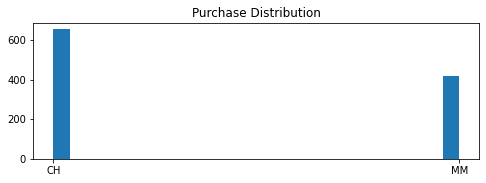

In [10]:
# Look at the distribution

num_bins = 25

for col in df.columns:
  fig, ax = plt.subplots()
  fig.set_size_inches(8, 2.5)
  n, bins, patches = ax.hist(df[col], num_bins)
  ax.set_title((col + ' Distribution'))
  plt.show()

In [11]:
# Update store with one hot encoding 

df['Store_1'] = np.where(df['StoreID']== 1, 1, 0)
df['Store_2'] = np.where(df['StoreID']== 2, 1, 0)
df['Store_3'] = np.where(df['StoreID']== 3, 1, 0)
df['Store_4'] = np.where(df['StoreID']== 4, 1, 0)
df['Store_7'] = np.where(df['StoreID']== 7, 1, 0)
df.head(3)

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,Purchase,Store_1,Store_2,Store_3,Store_4,Store_7
0,237,1,1.75,1.99,0.00,0.0,0,0,0.50,CH,1,0,0,0,0
1,239,1,1.75,1.99,0.00,0.3,0,1,0.60,CH,1,0,0,0,0
2,245,1,1.86,2.09,0.17,0.0,0,0,0.68,CH,1,0,0,0,0


#### Create X and y, and Compare Preprocessing Methods

In [15]:
# Split X and y 

X = df.drop(columns=['Purchase','StoreID'])
y = df['Purchase']

In [16]:
# Understand the impact on distribution with log, yeo-johnson and standard 
# Will use pipeline to apply chosen on training set
# This is more exploratory 

list_columns = X.columns
list_log = []
list_john = []
list_stnd = []
for col in list_columns:
  list_log.append(col+'_Log')
  list_john.append(col+'_John')
  list_stnd.append(col+'_Stnd')

df_sel = X.copy()
logtransformer = FunctionTransformer(np.log1p)
johnpt = PowerTransformer(method='yeo-johnson')
stnd_scaler = StandardScaler()
df_sel[(list_john)] = johnpt.fit_transform(df_sel[(list_columns)])
df_sel[(list_log)] = logtransformer.fit_transform(df_sel[(list_columns)])
df_sel[(list_stnd)] = stnd_scaler.fit_transform(df_sel[(list_columns)])

df_sel.head(3)

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,Store_1,Store_2,Store_3,Store_4,Store_7,WeekofPurchase_John,PriceCH_John,PriceMM_John,DiscCH_John,DiscMM_John,SpecialCH_John,SpecialMM_John,LoyalCH_John,Store_1_John,Store_2_John,Store_3_John,Store_4_John,Store_7_John,WeekofPurchase_Log,PriceCH_Log,PriceMM_Log,DiscCH_Log,DiscMM_Log,SpecialCH_Log,SpecialMM_Log,LoyalCH_Log,Store_1_Log,Store_2_Log,Store_3_Log,Store_4_Log,Store_7_Log,WeekofPurchase_Stnd,PriceCH_Stnd,PriceMM_Stnd,DiscCH_Stnd,DiscMM_Stnd,SpecialCH_Stnd,SpecialMM_Stnd,LoyalCH_Stnd,Store_1_Stnd,Store_2_Stnd,Store_3_Stnd,Store_4_Stnd,Store_7_Stnd
0,237,1.75,1.99,0.00,0.0,0,0,0.50,1,0,0,0,0,-1.114358,-1.158517,-0.953712,-0.524278,-0.646827,-0.416228,-0.439164,-0.272348,2.411491,-0.511657,-0.473557,-0.386396,-0.706116,5.472271,1.011601,1.095273,0.000000,0.000000,0.0,0.000000,0.405465,0.693147,0.0,0.0,0.0,0.0,-1.117696,-1.152062,-0.710313,-0.441664,-0.577188,-0.416228,-0.439164,-0.213788,2.411491,-0.511657,-0.473557,-0.386396,-0.706116
1,239,1.75,1.99,0.00,0.3,0,1,0.60,1,0,0,0,0,-1.000962,-1.158517,-0.953712,-0.524278,1.481000,-0.416228,2.277053,0.056479,2.411491,-0.511657,-0.473557,-0.386396,-0.706116,5.480639,1.011601,1.095273,0.000000,0.262364,0.0,0.693147,0.470004,0.693147,0.0,0.0,0.0,0.0,-0.989087,-1.152062,-0.710313,-0.441664,0.826428,-0.416228,2.277053,0.111205,2.411491,-0.511657,-0.473557,-0.386396,-0.706116
2,245,1.86,2.09,0.17,0.0,0,0,0.68,1,0,0,0,0,-0.649022,-0.055270,-0.193713,1.938674,-0.646827,-0.416228,-0.439164,0.328100,2.411491,-0.511657,-0.473557,-0.386396,-0.706116,5.505332,1.050822,1.128171,0.157004,0.000000,0.0,0.000000,0.518794,0.693147,0.0,0.0,0.0,0.0,-0.603260,-0.072806,0.034162,1.006140,-0.577188,-0.416228,-0.439164,0.371200,2.411491,-0.511657,-0.473557,-0.386396,-0.706116


Text(0.5, 1.0, 'PriceMM Distribution')

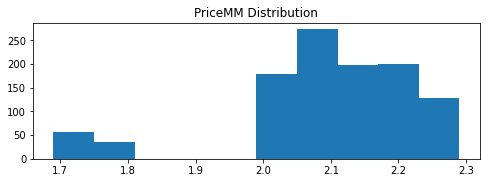

Text(0.5, 1.0, 'PriceMM_Log Distribution')

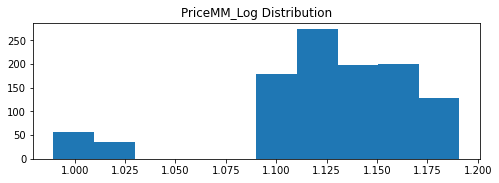

Text(0.5, 1.0, 'PriceMM_John Distribution')

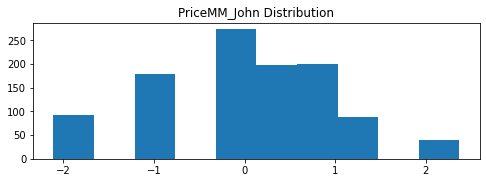

Text(0.5, 1.0, 'PriceMM_Stnd Distribution')

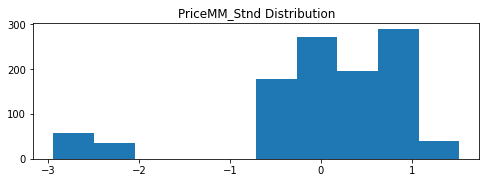

In [17]:
# Look at price now with the various processing methods

num_bins = 10
for col in ['PriceMM','PriceMM_Log','PriceMM_John','PriceMM_Stnd']:
  fig, ax = plt.subplots()
  fig.set_size_inches(8, 2.5)
  n, bins, patches = ax.hist(df_sel[(col)], num_bins)
  ax.set_title(col + ' Distribution')
  plt.show()

### Create Test and Train Data

The data is split 80% train (856 instances) 20% test (214 instances). The training tables are used to train the model. We do not want to include the testing data in our training (to simulate real life), otherwise the training will be biased.

In [19]:
# Train test split method

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=42)

In [20]:
# Show shape of tables

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (856, 13)
y_train shape: (856,)
X_test shape: (214, 13)
y_test shape: (214,)


## Models and Output

### SVM - Linear SVC

In [21]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

LinearSVC = LinearSVC(penalty='l2')
rfe = RFE(estimator=LinearSVC)

SVCPipe = Pipeline([('PT', PowerTransformer(method='yeo-johnson')),
                    ('rfe',rfe),
                    ('SVC',LinearSVC)
                   ])
param_grid = {'rfe__n_features_to_select':(5,7,9,11,13),
              'SVC__C': np.arange(1,2,3),
              'SVC__loss': ('hinge','squared_hinge'),
              'SVC__class_weight': ('balanced',None)
              }
SVC = GridSearchCV(SVCPipe,param_grid,cv=10,scoring='f1_micro')
SVC.fit(X_train,y_train)
print('\n\nBest Score:', SVC.best_score_,'\n')
print('Best parameters:', SVC.best_params_)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('PT',
                                        PowerTransformer(copy=True,
                                                         method='yeo-johnson',
                                                         standardize=True)),
                                       ('rfe',
                                        RFE(estimator=LinearSVC(C=1.0,
                                                                class_weight=None,
                                                                dual=True,
                                                                fit_intercept=True,
                                                                intercept_scaling=1,
                                                                loss='squared_hinge',
                                                                max_iter=1000,
                                      



Best Score: 0.8341039671682626 

Best parameters: {'SVC__C': 1, 'SVC__class_weight': None, 'SVC__loss': 'squared_hinge', 'rfe__n_features_to_select': 7}


In [22]:
bestSVC = SVC.best_estimator_
pred = bestSVC.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix:\n',confusion_matrix(y_test, pred))
print('\nClassification report:\n',classification_report(y_test, pred))

Confusion matrix:
 [[115  15]
 [ 27  57]]

Classification report:
               precision    recall  f1-score   support

          CH       0.81      0.88      0.85       130
          MM       0.79      0.68      0.73        84

    accuracy                           0.80       214
   macro avg       0.80      0.78      0.79       214
weighted avg       0.80      0.80      0.80       214



### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2

KNN = KNeighborsClassifier()
skb = SelectKBest(chi2)

KNNPipe= Pipeline([('log', FunctionTransformer(np.log1p)),
                   ('skb',skb),
                   ('KNN',KNN)
                   ])
param_grid = {'skb__k':(5,7,9,11,13),     
              'KNN__weights': ('uniform','distance'),
              'KNN__algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
              'KNN__metric': ('euclidean','manhattan','chebyshev','minkowski')
              }
KNearest = GridSearchCV(KNNPipe,param_grid,cv=10,scoring='f1_micro')
KNearest.fit(X_train,y_train)
print('\n\nBest Score:', KNearest.best_score_,'\n')
print('Best parameters:', KNearest.best_params_)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('log',
                                        FunctionTransformer(accept_sparse=False,
                                                            check_inverse=True,
                                                            func=<ufunc 'log1p'>,
                                                            inv_kw_args=None,
                                                            inverse_func=None,
                                                            kw_args=None,
                                                            validate=False)),
                                       ('skb',
                                        SelectKBest(k=10,
                                                    score_func=<function chi2 at 0x7f5ed7cc0d08>)),
                                       ('KNN',
                                        KNeighborsClassifier(algori



Best Score: 0.8072777017783856 

Best parameters: {'KNN__algorithm': 'brute', 'KNN__metric': 'manhattan', 'KNN__weights': 'uniform', 'skb__k': 11}


In [24]:
bestKNearest = KNearest.best_estimator_
pred = bestKNearest.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix:\n',confusion_matrix(y_test, pred))
print('\nClassification report:\n',classification_report(y_test, pred))

Confusion matrix:
 [[114  16]
 [ 27  57]]

Classification report:
               precision    recall  f1-score   support

          CH       0.81      0.88      0.84       130
          MM       0.78      0.68      0.73        84

    accuracy                           0.80       214
   macro avg       0.79      0.78      0.78       214
weighted avg       0.80      0.80      0.80       214



### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

DTree = DecisionTreeClassifier()
rfe = RFE(estimator=DTree)

DTPipe = Pipeline([('PT', PowerTransformer(method='yeo-johnson')),
                   ('rfe', rfe),
                   ('DT', DTree)
                   ])
param_grid = {'rfe__n_features_to_select':(5,7,9,11,13), 
              'DT__max_depth': (3,5,7,9),
              'DT__min_samples_split': (3,5,7,9),
              'DT__criterion': ('gini','entropy')
              }
DT = GridSearchCV(DTPipe,param_grid,cv=10,scoring='f1_micro')
DT.fit(X_train,y_train)
print('\n\nBest Score:', DT.best_score_,'\n')
print('Best parameters:', DT.best_params_)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('PT',
                                        PowerTransformer(copy=True,
                                                         method='yeo-johnson',
                                                         standardize=True)),
                                       ('rfe',
                                        RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                             class_weight=None,
                                                                             criterion='gini',
                                                                             max_depth=None,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                               



Best Score: 0.8107523939808482 

Best parameters: {'DT__criterion': 'gini', 'DT__max_depth': 5, 'DT__min_samples_split': 9, 'rfe__n_features_to_select': 7}


In [26]:
bestDT = DT.best_estimator_
pred = bestDT.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix:\n',confusion_matrix(y_test, pred))
print('\nClassification report:\n',classification_report(y_test, pred))

Confusion matrix:
 [[113  17]
 [ 32  52]]

Classification report:
               precision    recall  f1-score   support

          CH       0.78      0.87      0.82       130
          MM       0.75      0.62      0.68        84

    accuracy                           0.77       214
   macro avg       0.77      0.74      0.75       214
weighted avg       0.77      0.77      0.77       214

